## Global Imports

In [27]:
import numpy as np
import matplotlib.pyplot as plt

## Functions used in Problem 1 - Questions 1, 2, 3

In [28]:
def generate_big_phi(x, thetas_len, N):
    """
        Generates big phi matrix, containing all samples in training set, raised to the appropriate power. 
        Matrix size: N*(l+1), N: Training set size, l: Number of features in theta vector (theta_len)
    """
    
    # powers = [1,2,...thetas_len,0
    #              ...
    #          1,2,...thetas_len,0]    
    powers = np.tile(np.concatenate([np.arange(1, thetas_len), np.array([0])]), (N,1))
    
    # Tiles each value in x vector (thetas_len+1) times. The resulting matrix is size N*(l+1).
    tiled_x = np.tile(x, (1, powers.shape[1]))
    
    # Element-wise power of matrix tiled_x to powers matrix.
    return np.power(tiled_x, powers)

In [29]:
def calculate_y(x, thetas, N, noise_variance=-0.1):
    """
        Calculates vector y, containing the observations or predictions, using the relationship: y=big_phi*thetas
        Matrix size: (N,1)
        If we want to apply gaussian noise to generate synthetic observations, we pass a positive
            noise variance as the last argument of the function.
        
    """
    big_phi = generate_big_phi(x, len(thetas), N)
    
    y = np.matmul(big_phi, thetas)

    if noise_variance > 0:
        gaussian_noise = np.random.normal(0, np.sqrt(noise_variance), N).reshape((N,1))
        y_withnoise = y + gaussian_noise
        return y_withnoise
    else:
        return y

In [30]:
def LS_method(X, y):    
    """
        Implementation of LS method. Calculates theta_prediction vector using the relationship: 
            theta_pred = (X^T X)^-1 X^T y
    """
    Xt = np.transpose(X)
    Xt_X = np.matmul(Xt, X)
    Xt_X_inverse = np.linalg.inv(Xt_X) 
    
    theta_pred = np.matmul(np.matmul(Xt_X_inverse, Xt), y)
    
    return theta_pred

In [31]:
def MSE_error(y_true, y_predicted):
    """
        Calculates MSE error between y_true and y_predicted
    """
    return np.square(np.subtract(y_true, y_predicted)).mean()

In [32]:
def calculate_Y(x_train, N_train, thetas, degrees, experiments):
    
    """
        After conduncting a number of experiments using different noise variances in each experiment,   
            we generate the Y matrix. Each column of the Y matrix contains the predicted values y in each experiment.
        Matrix size: N*experiments
    """
    Y = np.zeros((N_train, experiments)) 
    
    for i in range(experiments):
    
        y_train = calculate_y(x_train, thetas, N_train, 0.1)
        X = generate_big_phi(x_train, degrees+1, N_train)

        theta_pred = LS_method(X, y_train)        

        y_train_pred = calculate_y(x_train, theta_pred, N_train)    

        Y[:, i] = np.squeeze(y_train_pred)    
    return Y

## Problem 1 - Question 1

In this question, we applied the Least Squares method to calculate estimates of the parameter vector theta using a set of observations / training set. The observations are synthetic data, generated by using the structure of the true theta vector on a set of points ($N_{train}=20$) randomly picked in the interval $[0,2]$, with additive Gaussian noise of mean 0 and variance $\sigma_\eta^2=0.1$. 

By using the LS method, we obtained an estimate for the true theta vector. This estimate $\theta_{LS}$ for $\theta_{true}$ is given by: $\theta_{LS} = (\Phi^{Τ}\Phi)^{-1}\Phi^{Τ}y_{train}$

We calculated the MSE error on the train set and then used the estimated theta vector to make predictions on a test set of 1000 randomly selected points in $[0,2]$. Finally, we calculated the MSE error on the test set, between the predictions given by the estimated theta and the true theta vector.

In [33]:
# Parameters
N_train = 20
noise_variance = 0.1
# True theta vector in the form of [theta1, theta2,..., theta0]
thetas = np.array([-1, 0.9, 0.7, 0, -0.2, 0.2]).reshape((6,1))

# Generates synthetic data by taking N_train x-values, finding the true prediction y by using the true theta
# vector and then adding Gaussian noise of mean value 0 and variance 0.1.
x_train = np.linspace(0, 2, num=N_train).reshape((N_train, 1))
X_train = generate_big_phi(x_train, len(thetas), N_train) 
y_train = calculate_y(x_train, thetas, N_train, noise_variance)

In [34]:
# Prediction for theta_vector using LS method.
theta_pred = LS_method(X_train, y_train)

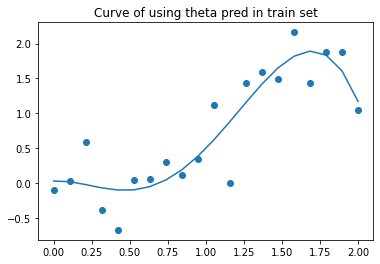

In [35]:
# Fit of predicted curve in train set.
y_train_pred = calculate_y(x_train, theta_pred, N_train)

fig = plt.figure()
plt.title("Curve of using theta pred in train set")
plt.scatter(x_train, y_train)
plt.plot(x_train, y_train_pred)

In [36]:
print(f"MSE error in train set: {MSE_error(y_train, y_train_pred)}")

MSE error in train set: 0.12420126809117074


In [37]:
# Making predictions in test set (N_test randomly selected points in [0,2])
N_test = 1000

x_test = np.sort(2 * np.random.sample(N_test)).reshape((N_test, 1))

# y_test_pred : values of y using the predicted theta vector
# y_test_true : values of y using the true theta vector
y_test_pred = calculate_y(x_test, theta_pred, N_test)
y_test_true = calculate_y(x_test, thetas, N_test)

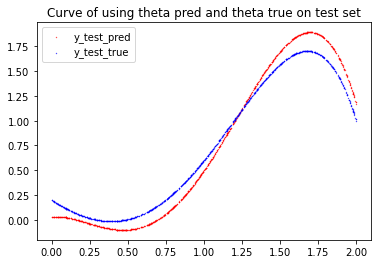

In [38]:
fig = plt.figure()
plt.title("Curve of using theta pred and theta true on test set")
plt.scatter(x_test, y_test_pred, s=0.1, c='red', label="y_test_pred")
plt.scatter(x_test, y_test_true, s=0.1, c='blue', label="y_test_true")
plt.legend(loc="upper left")

In [39]:
print(f"MSE error in test set: {MSE_error(y_test_pred, y_test_true)}")

MSE error in test set: 0.01545419406533262


## Comments

After running the LS method a few times, we observed that in all cases the MSE error in the train set is larger than the one in the test set. The fit of the curve in the test set can be greatly dependent on the additive noise on the samples of the train set. So, in order to evaluate the results of the LS method we have to consider the statistical properties of the noise.

If the noise in a lot of the points in the train set is large enough that they end up far away from the true curve (outliers), the MSE error is large and the shape of the curve diverges from the shape of the true curve. If we consider the small amount of train points (20 points) and the noise variance, our results are adequate. As the number of train points is small, any outliers largely increase the MSE error in the train set, with this phenomenon not being observed in the test set.



## Problem 1 - Question 2

In this question, we applied the LS method using: (a) a 2nd degree polynomial and  (b) a 10th degree polynomial 

for the structure of the prediction model. We conducted 100 experiments, using different noise variances in the generation of the training set (20 points in [0,2]) for each experiment. Afterwards, for each polynomial type and for every sample in the training set, we plotted the mean value of the predicted y across all experiments and an errorbar which corresponds to +- 1 standard deviation from the mean value.

To be able to visualize better the fit of each type of model, we plotted 5 resulting curves of each model as an intermediate step.

In [40]:
# Parameters
experiments = 100
degrees_1 = 2
degrees_2 = 10
N_train = 20
N_test = 1000

# Generation of train and test vectors.
x_train = np.linspace(0, 2, num=N_train).reshape((N_train, 1))
x_test = np.sort(2 * np.random.sample(N_test)).reshape((N_test, 1))

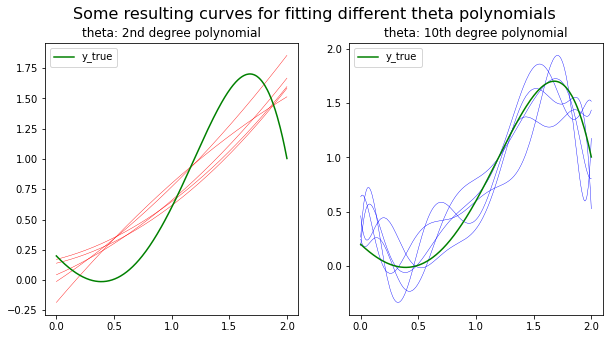

In [41]:
# A sample plot of 5 resulting curves from fitting each model of theta. 

fig, axs = plt.subplots(1,2, figsize=(10,5))

for i in range(5):
    
    y_train = calculate_y(x_train, thetas, N_train, 0.1)
    
    X_2 = generate_big_phi(x_train, degrees_1+1, N_train)    
    theta_pred_2 = LS_method(X_2, y_train)    
    y_test_2 = calculate_y(x_test, theta_pred_2, N_test)
    
    axs[0].plot(x_test, y_test_2, c='red', linewidth=0.4)
    
    X_10 = generate_big_phi(x_train, degrees_2+1, N_train)    
    theta_pred_10 = LS_method(X_10, y_train)    
    y_test_10 = calculate_y(x_test, theta_pred_10, N_test)
    
    axs[1].plot(x_test, y_test_10, c='blue', linewidth=0.4)

y_true = calculate_y(x_test, thetas, N_test)
axs[0].plot(x_test, y_true, c='green', label="y_true")
axs[1].plot(x_test, y_true, c='green', label="y_true")

axs[0].title.set_text('theta: 2nd degree polynomial')
axs[1].title.set_text('theta: 10th degree polynomial')
fig.suptitle("Some resulting curves for fitting different theta polynomials", fontsize=16)

axs[0].legend(loc="upper left")
axs[1].legend(loc="upper left")

In [42]:
# Matrices containing the y values across all experiments.
# Matrix size: Ntrain*experiments
Y_2 = calculate_Y(x_train, N_train, thetas, degrees_1, experiments)
Y_10 = calculate_Y(x_train, N_train, thetas, degrees_2, experiments)

In [43]:
# Taking mean and variances of each matrix.
Ymean_2 = np.mean(Y_2, axis=1)
Yvar_2 = np.var(Y_2, axis=1)

Ymean_10 = np.mean(Y_10, axis=1)
Yvar_10 = np.var(Y_10, axis=1)

In [44]:
print(f"Means from fitting a 2nd degree polynomial: {Ymean_2}")
print(f"Means from fitting a 10th degree polynomial: {Ymean_10}")

Means from fitting a 2nd degree polynomial: [-0.17299364 -0.09313578 -0.01086544  0.07381737  0.16091265  0.25042041
  0.34234063  0.43667333  0.5334185   0.63257615  0.73414627  0.83812886
  0.94452392  1.05333145  1.16455146  1.27818394  1.39422889  1.51268632
  1.63355621  1.75683858]
Means from fitting a 10th degree polynomial: [ 0.16753132  0.06793884  0.0496563  -0.01669616 -0.05563994 -0.01844132
  0.08407128  0.21711764  0.35839561  0.51042408  0.68976546  0.90635945
  1.14807706  1.38031407  1.56120622  1.66308508  1.68332387  1.6259672
  1.44271787  0.94118772]


In [45]:
print(f"Variances from fitting a 2nd degree polynomial: {Yvar_2}")
print(f"Variances from fitting a 10th degree polynomial: {Yvar_10}")

Variances from fitting a 2nd degree polynomial: [0.03755228 0.02498886 0.01700209 0.01244304 0.01031069 0.00975196
 0.01006171 0.01068274 0.01120576 0.01136944 0.01106035 0.01031302
 0.00930992 0.00838141 0.00800584 0.00880944 0.01156642 0.01719889
 0.0267769  0.04151844]
Variances from fitting a 10th degree polynomial: [0.08456349 0.10349158 0.05835735 0.04646477 0.04271332 0.04110002
 0.03585331 0.03783453 0.03785615 0.0337256  0.02895416 0.03705871
 0.04938633 0.04199263 0.03910862 0.04414297 0.03786411 0.05958774
 0.12157991 0.1143763 ]


In [46]:
# Calculates bias for each model.
y_train_true = calculate_y(x_train, thetas, N_train)

bias_2 = np.abs(Ymean_2-np.squeeze(y_train_true))
bias_10 = np.abs(Ymean_10-np.squeeze(y_train_true))

print(f"Biases from fitting a 2nd degree polynomial: {bias_2}")
print(f"Biases from fitting a 10th degree polynomial: {bias_10}")

Biases from fitting a 2nd degree polynomial: [0.37299364 0.19865878 0.04667717 0.07844021 0.17280273 0.23345024
 0.25866328 0.24827319 0.20397231 0.12962413 0.03157347 0.08104336
 0.1959884  0.29761187 0.36654201 0.37937491 0.30836434 0.1211116
 0.21974465 0.75683858]
Biases from fitting a 10th degree polynomial: [0.03246868 0.03758417 0.01384456 0.01207332 0.04374987 0.03541149
 0.00039393 0.0287175  0.02894941 0.00747206 0.01280733 0.01281276
 0.00756475 0.02937075 0.03011276 0.00552624 0.01926936 0.00783072
 0.02890631 0.05881228]


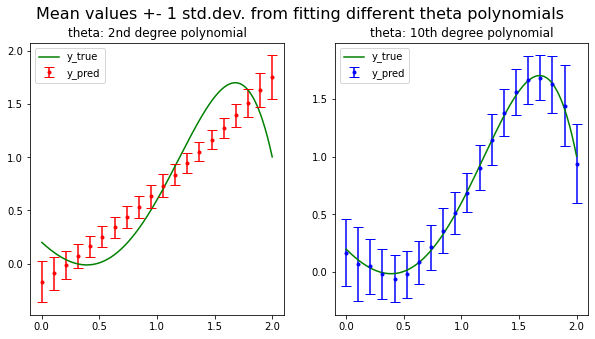

In [47]:
fig, axs = plt.subplots(1,2, figsize=(10,5))

axs[0].plot(x_test, y_true, c='green', label="y_true")
axs[1].plot(x_test, y_true, c='green', label="y_true")

axs[0].errorbar(x_train, Ymean_2, yerr=np.sqrt(Yvar_2), c='red', fmt='.', capsize=5, label="y_pred")
axs[1].errorbar(x_train, Ymean_10, yerr=np.sqrt(Yvar_10), c='blue', fmt='.', capsize=5, label="y_pred")

axs[0].title.set_text('theta: 2nd degree polynomial')
axs[1].title.set_text('theta: 10th degree polynomial')
plt.suptitle("Mean values +- 1 std.dev. from fitting different theta polynomials", fontsize=16)

axs[0].legend(loc="upper left")
axs[1].legend(loc="upper left")

## Comments


We can see from the plot of the 5 resulting functions and the plot above that the 2nd polynomial underfits the train dataset. In this case, there are not enough parameters to give a good estimation of the data generated by the higher level polynomial (5th degree). In contrast, the 10th degree polynomial results in overfitting, where the theta vector has more parameters than tne true vector and the model is able to learn the noise used to generate the training data. This model is not able to generalize well to unseen data.

This situation describes the 'bias-variance dilemma'. In an ideal world, we would like to choose a model which would fit the train data to a great degree and would be able to generalize well to unseen data. If we are biased to a simple model (high bias) by minimizing the number of parameters, we are underfitting the data and as a result the variance is small. If we increase the complexity of the model (small bias, large number of parameters), we are overfitting the data, the variance is high and we cannot generalize well to unseen data. The results from fitting the two polynomials confirm this assumption for every point in the train set:
* bias_2 > bias_10
* variance_2 < variance_10

Thus, we have to carefully increase the number of parameters and complexity of the model, trying to balance the increase of bias and the increase of the model's variance.


## Functions used in Problem 1 - Question 3

In [48]:
def RR_method(X, y, lamda):    
    """
        Implementation of RR method. Calculates theta_prediction vector using the relationship: 
            theta_pred = (X^T X + lambda * identity_matrix)^-1 X^T y
    """
    Xt = np.transpose(X)
    Xt_X = np.matmul(Xt, X)
    Xt_X_RR = Xt_X + lamda * np.identity(len(thetas))
    Xt_X_inverse = np.linalg.inv(Xt_X_RR) 
    
    theta_pred = np.matmul(np.matmul(Xt_X_inverse, Xt), y)
    
    return theta_pred

## Problem 1 - Question 3

Here, we repeated the task we were given in Question 1, but this time using the Ridge Regression method in order to find an estimator for the theta vector. What the RR method actually do is: it imposes a bias to our estimator $\theta$, which depends on a parameter $\lambda$: 

$θ_{RR} = (Φ^{Τ}Φ + λΙ)^{-1}Φ^{Τ}y$

We know that there is always a $\lambda>0$ that gives us a better estimator than the LS estimator.

We used the RR method to find an estimator for our parameter vector theta, for various values of lambda in the range of 0.0005-500.0. 
Then we used the models that our estimators gave us over our training set, and over a test set comprising of 1000 points randomly selected in the interval [0,2], and we also calculated the MSE of the y's.

*In order to get an idea about the values of lambda we would use, we decided to calculate the value of ${σ_{θ}^{2}}/{θ_{0}^{2}}$, which was proved to be the optimal lambda in the toy problem we did in class. In our case this gave as a $λ = 0.0042$, which actually led to a good MSE in the train and the test sets, and so we decided to start choosing values of lambda that were around this value.


In [49]:
# Parameters
N_train = 20
N_test = 1000
noise_variance = 0.1
thetas = np.array([-1, 0.9, 0.7, 0, -0.2, 0.2]).reshape((6,1))

# Lambdas array
lambdas = np.array([0.0005, 0.5, 5.0, 50.0, 500.0]).reshape((5,1))

In [50]:
# Train x and y vectors.
x_train = np.linspace(0, 2, num=N_train).reshape((N_train, 1))
X_train = generate_big_phi(x_train, len(thetas), N_train) 
y_train = calculate_y(x_train, thetas, N_train, noise_variance)

In [51]:
# MSE errors on the train set

# LS method
theta_LS = LS_method(X_train, y_train)
y_train_LS = calculate_y(x_train, theta_pred, N_train)

print(f"MSE error of LS method on train set: {MSE_error(y_train, y_train_LS)}")


# RR method
mse_train_errors = []

for i in range(len(lambdas)):
  
    theta_pred_it = RR_method(X_train, y_train, lambdas[i])
    y_train_pred_it = calculate_y(x_train, theta_pred_it, N_train)
    mse_train_errors.append(MSE_error(y_train, y_train_pred_it))

print(f"MSE errors from the different lambdas on the train set:\n {mse_train_errors}")

MSE error of LS method on train set: 0.08423449291939175
MSE errors from the different lambdas on the train set:
 [0.03653594925903352, 0.053127729852365246, 0.09282595283177433, 0.23606876103161248, 0.42319102074935033]


In [52]:
# MSE errors on the test set
x_test = np.sort(2 * np.random.sample(N_test)).reshape((N_test, 1)) 
y_true = calculate_y(x_test, thetas, N_test)

# LS method
y_test_LS = calculate_y(x_test, theta_pred, N_test)

print(f"MSE error of LS method on test set: {MSE_error(y_true, y_test_LS)}")


# RR methods
mse_test_errors = []

for i in range(len(lambdas)):
  
    theta_pred_it = RR_method(X_train, y_train, lambdas[i])
    y_test_it = calculate_y(x_test, theta_pred_it, N_test)
    mse_test_errors.append(MSE_error(y_true, y_test_it))

print(f"MSE errors from the different lambdas on the test set:\n {mse_test_errors}")

MSE error of LS method on test set: 0.01606718686292035
MSE errors from the different lambdas on the test set:
 [0.012333163201249352, 0.007628503737285277, 0.02853583415382195, 0.13948621536162167, 0.3227452469269148]


## Comments
So from the above values of the MSE's for the LS and the RR methods, we observe that indeed we have found some values of $λ$ for which the biased estimator gives us better results than the unbiased one, in terms of the MSE.


As the value of $\lambda$ increases, so does the regularization term $\lambda I$, biasing away the solution from the one obtained by the LS method. If the regularization term increases after a certain value ($\approx 5$ according to our tests), we are biased that much from the LS solution that the results start to become worse than the original method.